# Business Analytics Dashboard

### What the stakeholders want to know:
1. What are our best-selling products?

2. Which products generate the most revenue or are sold most frequently?

3. Who are our top customers?

4. Which customers are buying the most? Can we identify loyal or high-value customers?

5. What’s our revenue trend over time?

6. Are sales increasing or decreasing month by month?

7. Are there seasonal patterns?

8. Are certain products or purchases peaking during holidays or specific months?

9. Which countries bring in the most sales?

10. I see "United Kingdom" — are we selling to other countries too? Should we expand or focus on key regions?

11. How much are customers typically spending per transaction?

12. Can we improve this through upselling or promotions?


### As an analyst, how you can help me:

1. Create simple dashboards or reports with:

2. Top-selling products and total revenue.

3. Revenue trends by month or quarter.

4. Customer segmentation (e.g., high-spenders vs. one-time buyers).

5. Geographic distribution of customers.


## Recommend actions:

"Based on this, we could run promotions on our best-sellers..."

"We might want to reward our top customers with loyalty programs."

Translate data into decisions, not just charts:

Don’t show me just graphs. Tell me what to do with the insights.

Data source: https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business

In [1]:
#setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = "/Users/ramilojr.subiate/Documents/FILES/etl-to-dashboard/kaggle_data/sales_transaction.csv"
df = pd.read_csv(file_path)

#Preview
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


### Renaming Column Names

In [3]:
df.rename(columns={"TransactionNo":"transaction_num", "Date":"date",
                   "ProductNo":"product_num","ProductName":"product_name",
                   "Price":"price", "Quantity":"quantity",
                   "CustomerNo":"customer_num", "Country":"country"}, inplace=True)
df.head()

,transaction_num,date,product_num,product_name,price,quantity,customer_num,country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


## Data Quality

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   transaction_num  536350 non-null  object 
 1   date             536350 non-null  object 
 2   product_num      536350 non-null  object 
 3   product_name     536350 non-null  object 
 4   price            536350 non-null  float64
 5   quantity         536350 non-null  int64  
 6   customer_num     536295 non-null  float64
 7   country          536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


### Converting date to datetime object

In [5]:
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   transaction_num  536350 non-null  object        
 1   date             536350 non-null  datetime64[ns]
 2   product_num      536350 non-null  object        
 3   product_name     536350 non-null  object        
 4   price            536350 non-null  float64       
 5   quantity         536350 non-null  int64         
 6   customer_num     536295 non-null  float64       
 7   country          536350 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.7+ MB


### Checking missing values

In [6]:
df.isna().sum()

transaction_num     0
date                0
product_num         0
product_name        0
price               0
quantity            0
customer_num       55
country             0
dtype: int64

In [7]:
df.fillna(0, inplace=True)
df.isna().sum()

transaction_num    0
date               0
product_num        0
product_name       0
price              0
quantity           0
customer_num       0
country            0
dtype: int64

### Checking duplicates

In [8]:
df.duplicated().sum()

np.int64(5200)

In [9]:
df.drop_duplicates(ignore_index=True, inplace=True)
print(f"duplicates: {df.duplicated().sum()}")
df.info()

duplicates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531150 entries, 0 to 531149
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   transaction_num  531150 non-null  object        
 1   date             531150 non-null  datetime64[ns]
 2   product_num      531150 non-null  object        
 3   product_name     531150 non-null  object        
 4   price            531150 non-null  float64       
 5   quantity         531150 non-null  int64         
 6   customer_num     531150 non-null  float64       
 7   country          531150 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.4+ MB


In [10]:
df.head()

,transaction_num,date,product_num,product_name,price,quantity,customer_num,country
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [11]:
df.describe()

,date,price,quantity,customer_num
count,531150,531150.000000,531150.000000,531150.000000
mean,2019-07-04 00:23:47.393391616,12.669787,9.988540,15221.035956
min,2018-12-01 00:00:00,5.130000,-80995.000000,0.000000
25%,2019-03-28 00:00:00,10.990000,1.000000,13798.000000
50%,2019-07-20 00:00:00,11.940000,3.000000,15146.000000
75%,2019-10-19 00:00:00,14.090000,10.000000,16727.000000
max,2019-12-09 00:00:00,660.620000,80995.000000,18287.000000
std,NaN,8.525988,217.700768,1723.519209


**Checking negative values**

In [12]:
quantity_with_negative = df[df["quantity"]<0]
print(quantity_with_negative)

(df["quantity"]<0).sum()

       transaction_num       date product_num  \
1611           C581484 2019-12-09       23843   
1612           C581490 2019-12-09       22178   
1613           C581490 2019-12-09       23144   
1614           C581568 2019-12-09       21258   
1615           C581569 2019-12-09       84978   
...                ...        ...         ...   
531145         C536548 2018-12-01       22168   
531146         C536548 2018-12-01       21218   
531147         C536548 2018-12-01       20957   
531148         C536548 2018-12-01       22580   
531149         C536548 2018-12-01       22767   

                            product_name  price  quantity  customer_num  \
1611           Paper Craft Little Birdie   6.19    -80995       16446.0   
1612     Victorian Glass Hanging T-Light   6.19       -12       14397.0   
1613     Zinc T-Light Holder Stars Small   6.04       -11       14397.0   
1614          Victorian Sewing Box Large   6.19        -5       15311.0   
1615    Hanging Heart Jar T-Light Ho

np.int64(8548)

In [13]:
df.sort_values("quantity", ascending=False)

,transaction_num,date,product_num,product_name,price,quantity,customer_num,country
142,581483,2019-12-09,23843,Paper Craft Little Birdie,12.38,80995,16446.0,United Kingdom
469458,541431,2019-01-18,23166,Medium Ceramic Top Storage Jar,11.32,74215,12346.0,United Kingdom
40967,578841,2019-11-25,84826,Asstd Design 3d Paper Stickers,6.19,12540,13256.0,United Kingdom
116287,573008,2019-10-27,84077,World War 2 Gliders Asstd Designs,10.47,4800,12901.0,United Kingdom
328460,554868,2019-05-27,22197,Popcorn Holder,10.99,4300,13135.0,United Kingdom
...,...,...,...,...,...,...,...,...
374888,C550456,2019-04-18,21175,Gin And Tonic Diet Metal Sign,12.15,-2000,15749.0,United Kingdom
374889,C550456,2019-04-18,21108,Fairy Cake Flannel Assorted Colour,12.40,-3114,15749.0,United Kingdom
528079,C536757,2018-12-02,84347,Rotating Silver Angels T-Light Hldr,10.28,-9360,15838.0,United Kingdom
470798,C541433,2019-01-18,23166,Medium Ceramic Top Storage Jar,11.32,-74215,12346.0,United Kingdom


**Dropping "transaction_num"**

In [14]:
df.drop(columns="transaction_num", inplace=True)

**Converting negative values in "quantity" column to absolute value**

In [15]:
df["quantity"] = df["quantity"].abs()
df.describe()

,date,price,quantity,customer_num
count,531150,531150.000000,531150.000000,531150.000000
mean,2019-07-04 00:23:47.393391616,12.669787,11.003082,15221.035956
min,2018-12-01 00:00:00,5.130000,1.000000,0.000000
25%,2019-03-28 00:00:00,10.990000,1.000000,13798.000000
50%,2019-07-20 00:00:00,11.940000,3.000000,15146.000000
75%,2019-10-19 00:00:00,14.090000,11.000000,16727.000000
max,2019-12-09 00:00:00,660.620000,80995.000000,18287.000000
std,NaN,8.525988,217.651849,1723.519209


**Checking duplicates after negative values in "quantity column" has been converted to absolute value**

In [16]:
df.duplicated().sum()

np.int64(2044)

**Dropping duplicates**

In [17]:
df.drop_duplicates(ignore_index=True, inplace=True)
df.duplicated().sum()

np.int64(0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529106 entries, 0 to 529105
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          529106 non-null  datetime64[ns]
 1   product_num   529106 non-null  object        
 2   product_name  529106 non-null  object        
 3   price         529106 non-null  float64       
 4   quantity      529106 non-null  int64         
 5   customer_num  529106 non-null  float64       
 6   country       529106 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.3+ MB


In [19]:
df.describe()

,date,price,quantity,customer_num
count,529106,529106.000000,529106.000000,529106.000000
mean,2019-07-04 01:28:19.716881408,12.665758,10.801121,15219.659760
min,2018-12-01 00:00:00,5.130000,1.000000,0.000000
25%,2019-03-28 00:00:00,10.990000,1.000000,13798.000000
50%,2019-07-20 00:00:00,11.940000,3.000000,15144.000000
75%,2019-10-19 00:00:00,14.090000,11.000000,16725.000000
max,2019-12-09 00:00:00,660.620000,80995.000000,18287.000000
std,NaN,8.408215,192.631269,1722.663464


## Feature Engineering

Adding day_name, week, month, and year

In [20]:
df["day_name"] = df["date"].dt.day_name()
df["week"] = df["date"].dt.isocalendar().week
df["month_name"] = df["date"].dt.month_name()
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year
df = df.sort_values(["year", "month"], ignore_index=True)
df.head(5)


,date,product_num,product_name,price,quantity,customer_num,country,day_name,week,month_name,month,year
0,2018-12-23,85161,Acrylic Geometric Lamp,49.47,1,13958.0,United Kingdom,Sunday,51,December,12,2018
1,2018-12-23,22423,Regency Cakestand 3 Tier,36.38,5,14955.0,United Kingdom,Sunday,51,December,12,2018
2,2018-12-23,22423,Regency Cakestand 3 Tier,36.38,2,13958.0,United Kingdom,Sunday,51,December,12,2018
3,2018-12-23,22503,Cabin Bag Vintage Paisley,36.38,1,13958.0,United Kingdom,Sunday,51,December,12,2018
4,2018-12-23,22760,Tray Breakfast In Bed,36.38,1,13958.0,United Kingdom,Sunday,51,December,12,2018


**Adding "revenue" Column**
revenue = price * quantity

In [21]:
df["revenue"] = df["price"] * df["quantity"]
df.head()

,date,product_num,product_name,price,quantity,customer_num,country,day_name,week,month_name,month,year,revenue
0,2018-12-23,85161,Acrylic Geometric Lamp,49.47,1,13958.0,United Kingdom,Sunday,51,December,12,2018,49.47
1,2018-12-23,22423,Regency Cakestand 3 Tier,36.38,5,14955.0,United Kingdom,Sunday,51,December,12,2018,181.90
2,2018-12-23,22423,Regency Cakestand 3 Tier,36.38,2,13958.0,United Kingdom,Sunday,51,December,12,2018,72.76
3,2018-12-23,22503,Cabin Bag Vintage Paisley,36.38,1,13958.0,United Kingdom,Sunday,51,December,12,2018,36.38
4,2018-12-23,22760,Tray Breakfast In Bed,36.38,1,13958.0,United Kingdom,Sunday,51,December,12,2018,36.38


### Best-selling products

**Top 10 most frequently purchased products**

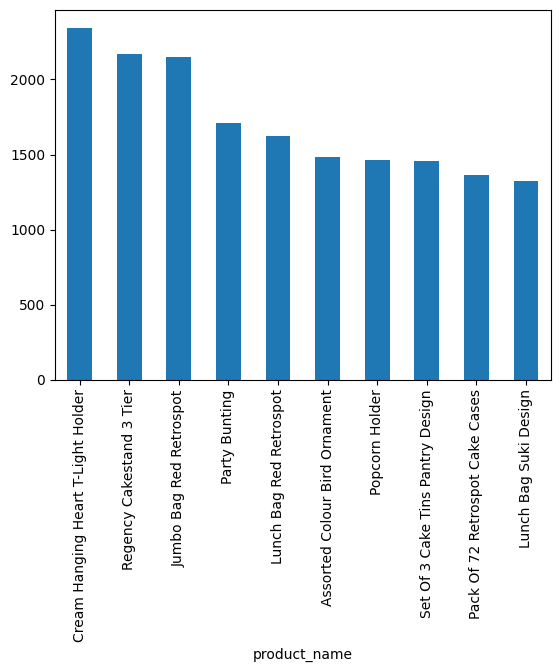

In [22]:
frequent_purchased_products = df["product_name"].value_counts().head(10)
frequent_purchased_products.sort_values(ascending=False).plot(kind="bar")
plt.show()

**Top 10 highest number of products sold**

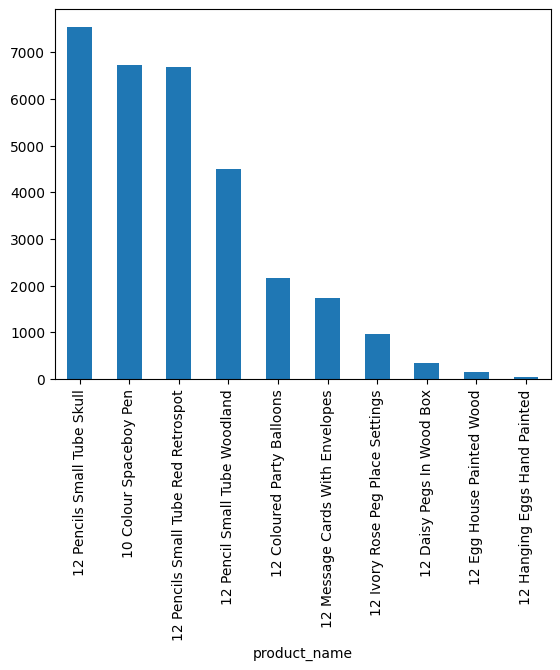

In [23]:
most_num_of_products_sold = df.groupby("product_name")["quantity"].sum().head(10)
most_num_of_products_sold.sort_values(ascending=False).plot(kind="bar")
plt.show()



**Top customers**

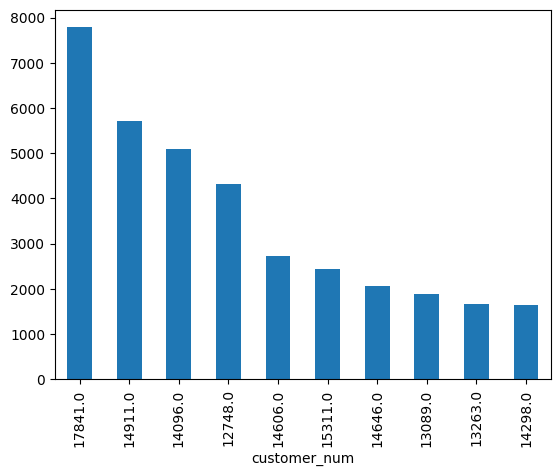

In [24]:
top_customers = df["customer_num"].value_counts().sort_values(ascending=False).head(10)
top_customers.plot(kind="bar")
plt.show()

**High Value or Loyal Customers**

Customers who are buying the most



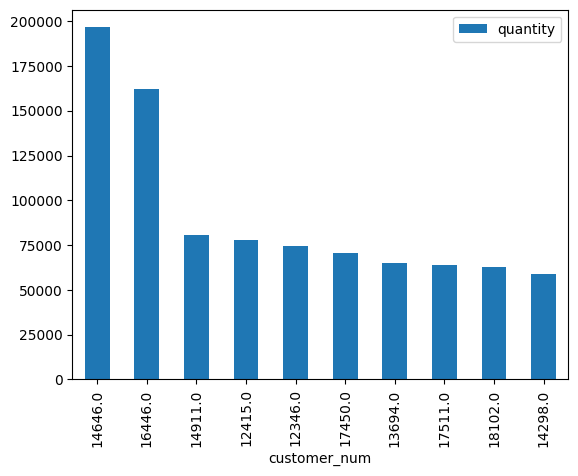

In [25]:
loyal_customer = df.pivot_table(values="quantity", index="customer_num", aggfunc="sum")
loyal_customer.sort_values("quantity", ascending=False, inplace=True)
loyal_customer.head(10).plot(kind="bar")
plt.show()



**Revenue trend over time**

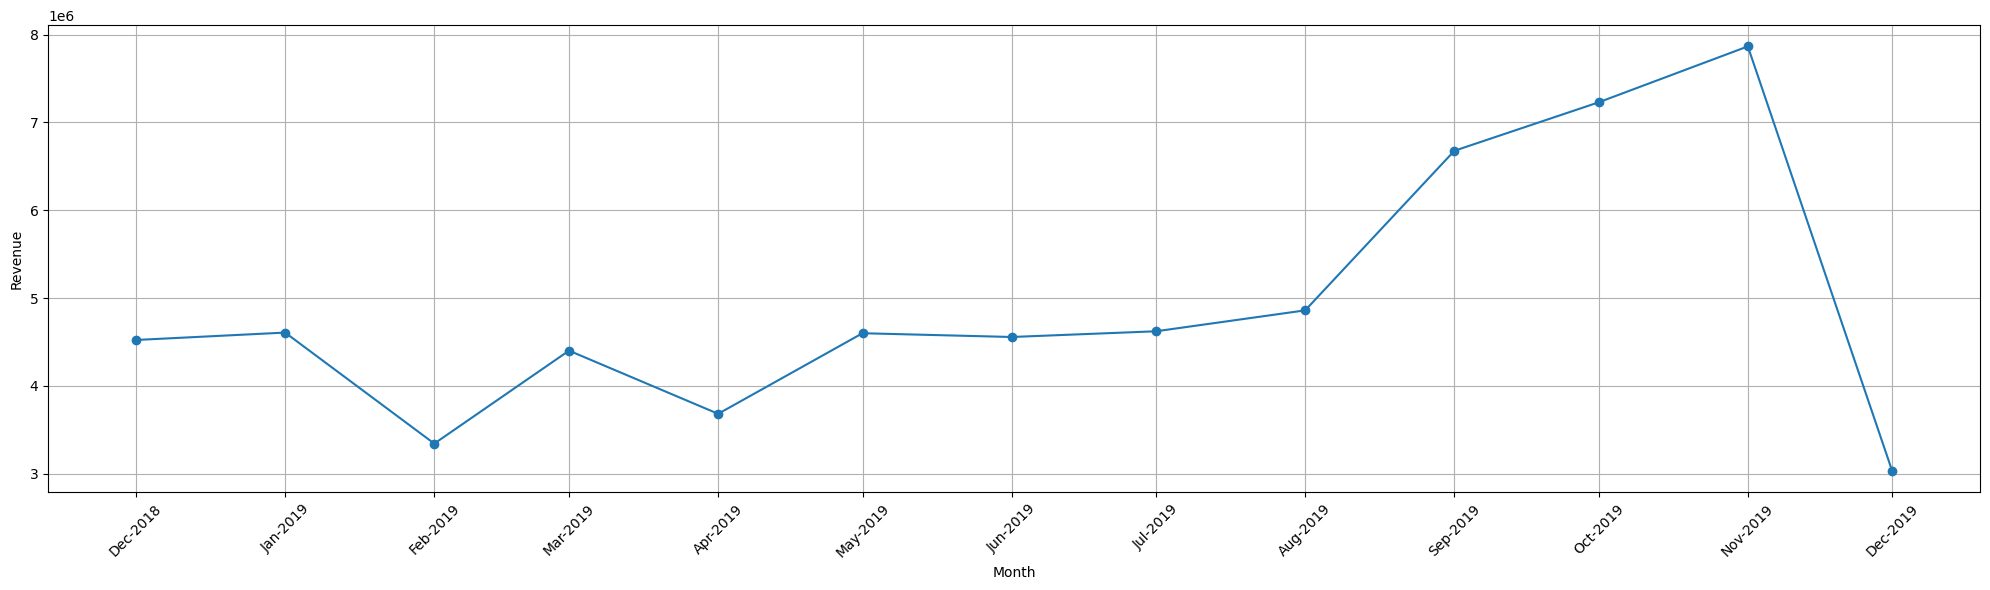

In [28]:
df["year_month"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str).str.zfill(2))

revenue_over_time = df.pivot_table(values="revenue", index="year_month", aggfunc="sum").reset_index()

plt.figure(figsize=(20, 6))
plt.plot(revenue_over_time["year_month"], revenue_over_time["revenue"], marker="o")

plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(ticks=revenue_over_time["year_month"], labels=revenue_over_time["year_month"].dt.strftime("%b-%Y"), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Are there seasonal patterns?

by day_name

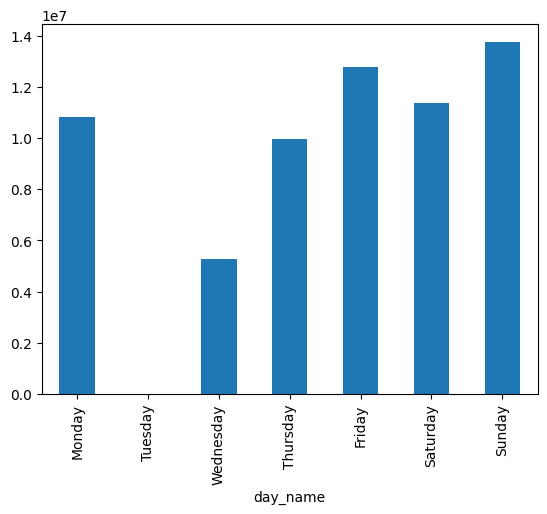

In [37]:
day_revenue = df.groupby("day_name")["revenue"].sum()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_revenue = day_revenue.reindex(day_order)

day_revenue.plot(kind="bar")
plt.show()


by Month

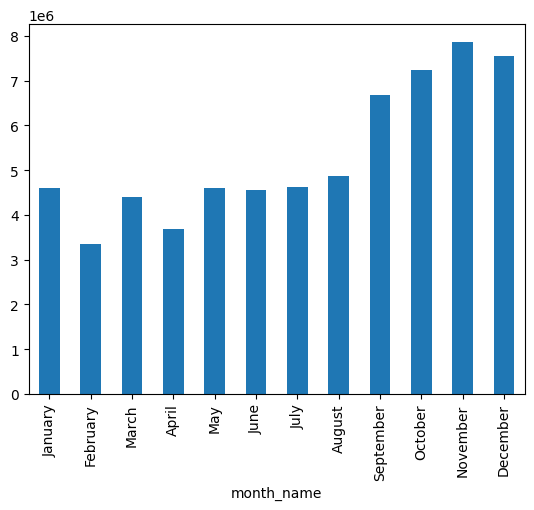

In [51]:
month_revenue = df.groupby("month_name")["revenue"].sum()
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_revenue = month_revenue.reindex(month_order)


month_revenue.plot(kind="bar")
plt.show()


In [49]:
df.head()
df.groupby("month_name")["revenue"].sum()

month_name
April        3681552.17
August       4859635.73
December     7552997.77
February     3342346.68
January      4606613.38
July         4621458.37
June         4556430.93
March        4400882.91
May          4599233.36
November     7865408.51
October      7228733.74
September    6676551.52
Name: revenue, dtype: float64

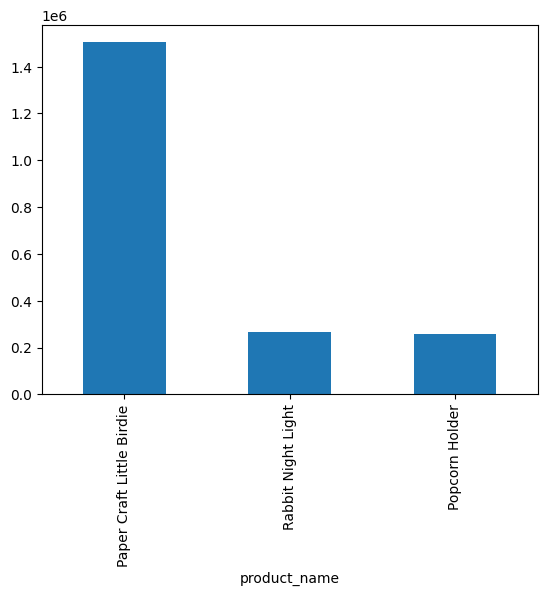

In [74]:
month_ind = df.set_index("month_name")
x = month_ind.loc[["October", "November", "December"], ["product_name", "revenue"]]

x.groupby("product_name")["revenue"].sum().sort_values(ascending=False).head(3).plot(kind="bar")
plt.show()


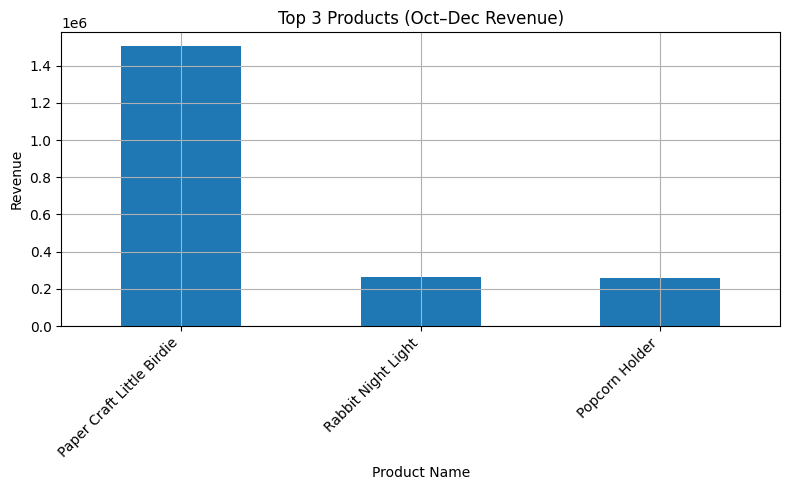

In [76]:
# Make sure your month_name is a categorical type in correct order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
df["month_name"] = pd.Categorical(df["month_name"], categories=month_order, ordered=True)

# Filter for Oct–Dec
q4_df = df[df["month_name"].isin(["October", "November", "December"])]

top_products = (
    q4_df.groupby("product_name")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
)
top_products.plot(kind="bar", figsize=(8, 5), title="Top 3 Products (Oct–Dec Revenue)")
plt.ylabel("Revenue")
plt.xlabel("Product Name")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(True)
plt.show()



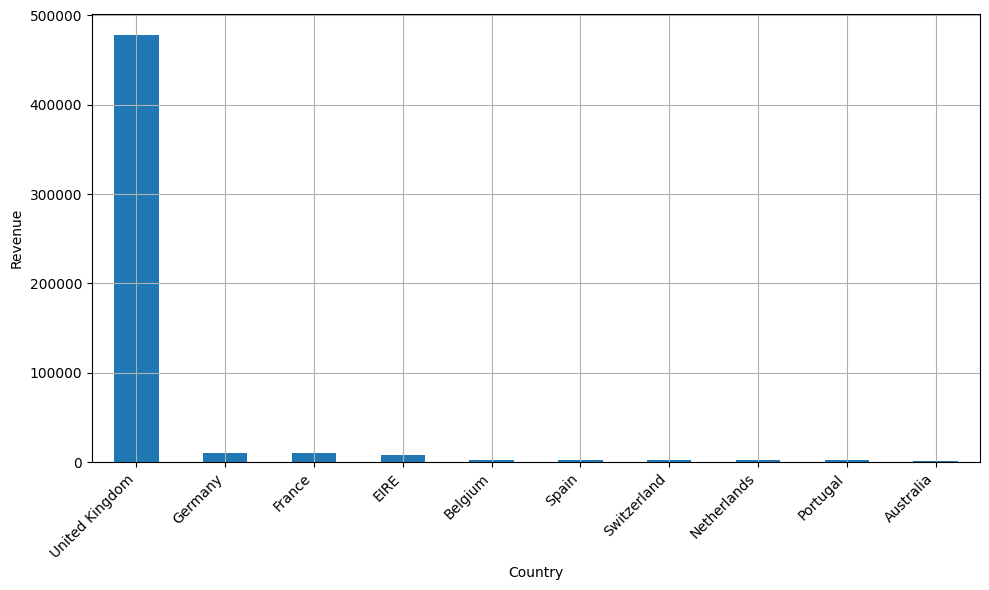

In [82]:
y = df["country"].value_counts().sort_values(ascending=False).head(10)
y.plot(kind="bar", figsize=(10, 6))
plt.ylabel("Revenue")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(True)
plt.show()


In [77]:
df.head()

,date,product_num,product_name,price,quantity,customer_num,country,day_name,week,month_name,month,year,revenue,year_month
0,2018-12-23,85161,Acrylic Geometric Lamp,49.47,1,13958.0,United Kingdom,Sunday,51,December,12,2018,49.47,2018-12-01
1,2018-12-23,22423,Regency Cakestand 3 Tier,36.38,5,14955.0,United Kingdom,Sunday,51,December,12,2018,181.90,2018-12-01
2,2018-12-23,22423,Regency Cakestand 3 Tier,36.38,2,13958.0,United Kingdom,Sunday,51,December,12,2018,72.76,2018-12-01
3,2018-12-23,22503,Cabin Bag Vintage Paisley,36.38,1,13958.0,United Kingdom,Sunday,51,December,12,2018,36.38,2018-12-01
4,2018-12-23,22760,Tray Breakfast In Bed,36.38,1,13958.0,United Kingdom,Sunday,51,December,12,2018,36.38,2018-12-01


How much are customers typically spending per transaction?

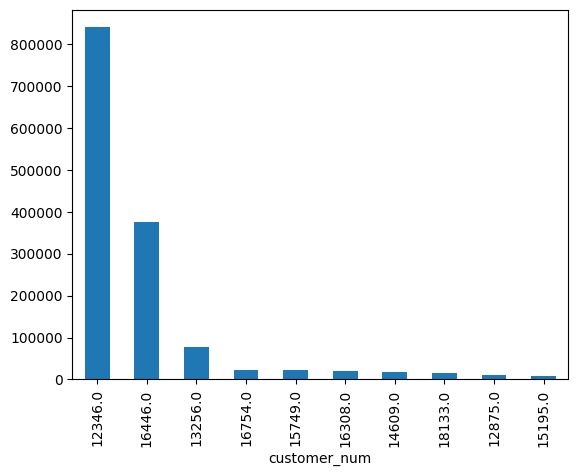

In [85]:
z = df.groupby("customer_num")["revenue"].mean().sort_values(ascending=False).head(10)
z.plot(kind="bar")
plt.show()